# Cluster analysis using k-means: Emissions/Population; WMG/GDP per capita

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'/Users/alexbor/Desktop/Data Analytics/Immersion/Submissions/6. Advanced Analytics/Project_Waste in the world'

In [4]:
#Import dataframes

df_all = pd.read_csv(os.path.join(path,'Prepared data','Complete_Dataset_without_outliers.csv'), index_col = False)


# Data cleaning 

In [5]:
df_all.shape

(4220, 13)

In [6]:
df_all.head()

,Unnamed: 0,Country,Year,Type of emissions,Gas type,"Emissions quantity, tonnes","Total population, thousands",Population density,GDP per capita,WMG,Emissions by year & country,GDP per cap. category,Country category by emissions
0,0,Aruba,2017,solid-waste-disposal,ch4,487.0,105.0,585.769,29329.0,NaN,55031.0,Upper-Middle GDP per cap.,Low emissions country
1,1,Aruba,2017,solid-waste-disposal,co2e_100yr,13636.0,105.0,585.769,29329.0,NaN,55031.0,Upper-Middle GDP per cap.,Low emissions country
2,2,Aruba,2017,solid-waste-disposal,co2e_20yr,40908.0,105.0,585.769,29329.0,NaN,55031.0,Upper-Middle GDP per cap.,Low emissions country
3,3,Aruba,2018,solid-waste-disposal,co2e_20yr,41244.0,105.0,588.675,30220.0,NaN,55483.0,Upper-Middle GDP per cap.,Low emissions country
4,16,Angola,2017,solid-waste-disposal,ch4,54100.0,30208.0,24.231,4042.0,NaN,6113300.0,Low-middle GDP per cap.,Moderate emissions country


In [7]:
#Deleting non-numerical columns
df_all = df_all.drop(columns=['Country','Year','Unnamed: 0', 'Type of emissions', 'Gas type', 'GDP per cap. category', 'Country category by emissions'])

In [8]:
df_all.head()

,"Emissions quantity, tonnes","Total population, thousands",Population density,GDP per capita,WMG,Emissions by year & country
0,487.0,105.0,585.769,29329.0,NaN,55031.0
1,13636.0,105.0,585.769,29329.0,NaN,55031.0
2,40908.0,105.0,585.769,29329.0,NaN,55031.0
3,41244.0,105.0,588.675,30220.0,NaN,55483.0
4,54100.0,30208.0,24.231,4042.0,NaN,6113300.0


In [9]:
df_all = df_all.drop(columns=['Emissions by year & country'])

In [10]:
df_all.head()

,"Emissions quantity, tonnes","Total population, thousands",Population density,GDP per capita,WMG
0,487.0,105.0,585.769,29329.0,NaN
1,13636.0,105.0,585.769,29329.0,NaN
2,40908.0,105.0,585.769,29329.0,NaN
3,41244.0,105.0,588.675,30220.0,NaN
4,54100.0,30208.0,24.231,4042.0,NaN


In [11]:
# Check for missing values

df_all.isnull().sum()

Emissions quantity, tonnes        0
Total population, thousands       0
Population density                0
GDP per capita                  294
WMG                            2759
dtype: int64

## Standardizing data: Z-Score

In [12]:

df_all['Emissions quantity, tonnes'] = (df_all['Emissions quantity, tonnes'] - df_all['Emissions quantity, tonnes'].mean()) / df_all['Emissions quantity, tonnes'].std()


In [13]:
df_all['Total population, thousands'] = (df_all['Total population, thousands'] - df_all['Total population, thousands'].mean()) / df_all['Total population, thousands'].std()


In [14]:
df_all['Population density'] = (df_all['Population density'] - df_all['Population density'].mean()) / df_all['Population density'].std()


In [15]:
df_all['GDP per capita'] = (df_all['GDP per capita'] - df_all['GDP per capita'].mean()) / df_all['GDP per capita'].std()


In [16]:
df_all['WMG'] = (df_all['WMG'] - df_all['WMG'].mean()) / df_all['WMG'].std()


In [17]:
df_all.head()

,"Emissions quantity, tonnes","Total population, thousands",Population density,GDP per capita,WMG
0,-0.470904,-0.528052,0.136364,0.693625,NaN
1,-0.468398,-0.528052,0.136364,0.693625,NaN
2,-0.463199,-0.528052,0.136364,0.693625,NaN
3,-0.463135,-0.528052,0.138141,0.736885,NaN
4,-0.460684,0.317829,-0.207115,-0.534114,NaN


# Elbow technique

In [18]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [19]:
#Dropping NaN as it has to be done to conduct further analysis
df_clean = df_all.dropna()


In [20]:
score = [kmeans[i].fit(df_clean).score(df_clean) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/alexbor/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/alexbor/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/alexbor/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/alexbor/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/alexb

[-6359.40513955116,
 -4618.956477367401,
 -3258.081602069393,
 -2505.794373562758,
 -2003.434169328155,
 -1774.9560981074312,
 -1605.4298544545593,
 -1410.469820426933,
 -1294.6297715812611]

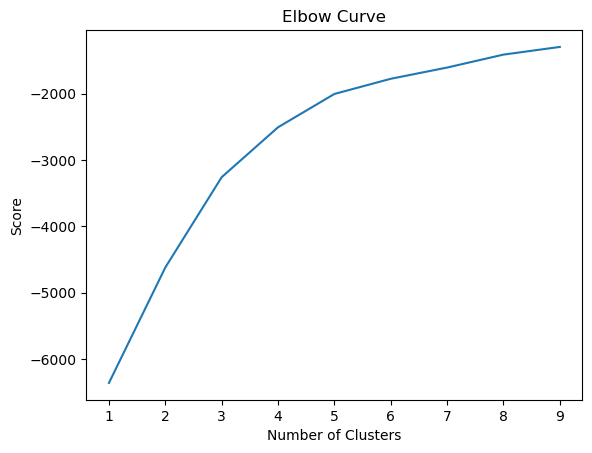

In [21]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

**I chose the number of clusters to be 5, as I can see that the curve jumps rapidly from three to five on the x-axis, then rises only slightly after five**

# k-means clustering

In [22]:
kmeans = KMeans(n_clusters = 5) 

In [23]:
# Fit the k-means object to the data.

kmeans.fit(df_clean)

/Users/alexbor/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [24]:
#Attaching a new column 'clusters'
df_clean['clusters'] = kmeans.fit_predict(df_clean)

/Users/alexbor/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/qt/rvr2fn4d76j_4yg25rnyl2000000gn/T/ipykernel_7635/2266886142.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['clusters'] = kmeans.fit_predict(df_clean)


In [25]:
df_clean.head()

,"Emissions quantity, tonnes","Total population, thousands",Population density,GDP per capita,WMG,clusters
27,0.087480,-0.450806,-0.158204,-0.419823,-0.711161,0
39,-0.468957,-0.452183,-0.161645,-0.511635,-1.128763,0
40,-0.413887,-0.452183,-0.161645,-0.511635,-1.128763,0
41,-0.299666,-0.452183,-0.161645,-0.511635,-1.128763,0
60,-0.450181,-0.528417,-0.093118,-0.012373,1.211678,3


In [26]:
#Calculating number of data points in each cluster
df_clean['clusters'].value_counts()

0    684
3    401
1    150
2    127
4     90
Name: clusters, dtype: int64

In [27]:
df_clean.to_csv(os.path.join(path, 'Prepared Data', 'Clusters.csv'))

# Plotting clusters

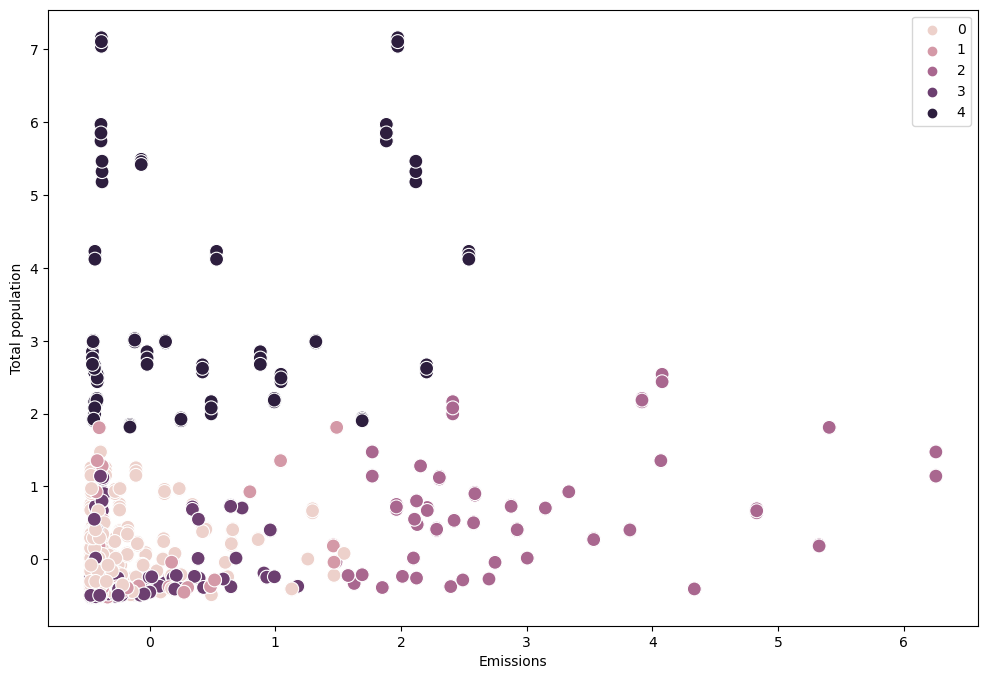

In [28]:
# Plot the clusters for the "Emissions" and "Total population" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_clean['Emissions quantity, tonnes'], y=df_clean['Total population, thousands'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Emissions') # Label x-axis.
plt.ylabel('Total population') # Label y-axis.
plt.show()

**The cluster 4 (black dots) indicates that the highest amounts of emissions are actually produced by the countries with low number of total population, which is surprising. There are only a few data values from the cluster 3 (dark purple) that indicate both: relatively high emissions and high number of population. It seems that the relationship I thought is true (the higher the population - the higher the emissions) is not correct. However, it works other way round, as there are a lot of data points especially from clusters 0 and 1 (and some from 2) that are concentrated in the crossroad of low emissions and low population number. So, the lower the population - the lower the quantity of emissions. The cluster 3's data points are mostly gathered in the left upper corner, thus indicating that larger populations also mean less emissions.** 

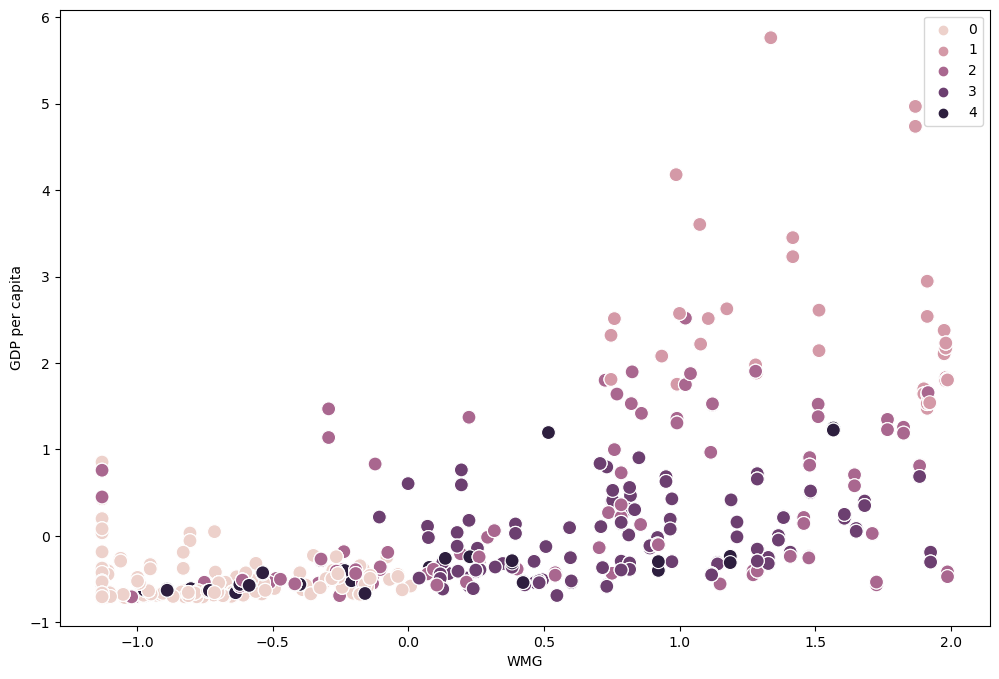

In [29]:
# Plot the clusters for the "WMG" and "GDP per capita" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_clean['WMG'], y=df_clean['GDP per capita'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('WMG') # Label x-axis.
plt.ylabel('GDP per capita') # Label y-axis.
plt.show()


**It is clear that the data points from cluster 2 are gathered in the area where higher WMG is crossing paths with the higher GDP per capita, which indicates that countries with higher GDP per capita invest more and perform better at Waste management than countries with a lower GDP per capita. However, there are also a lot of data points from cluster 1, where a relatively high WMG goes along with low GDP per capita. There is a clear evidence though that most of the countries with lower GDP per capita also show lower WMG as the cluster 0 indicates.**

_____________________________________


In [30]:
#Creating flags for diffent clusters and creating a column 'cluster'

df_clean.loc[df_clean['clusters'] == 4, 'cluster'] = 'black'
df_clean.loc[df_clean['clusters'] == 3, 'cluster'] = 'dark purple'
df_clean.loc[df_clean['clusters'] == 2, 'cluster'] = 'purple'
df_clean.loc[df_clean['clusters'] == 1, 'cluster'] = 'light purple'
df_clean.loc[df_clean['clusters'] == 0, 'cluster'] = 'pink'



/var/folders/qt/rvr2fn4d76j_4yg25rnyl2000000gn/T/ipykernel_7635/1271692728.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[df_clean['clusters'] == 4, 'cluster'] = 'black'


In [31]:
#grouping by 'cluster' colors and calculating statistics

df_clean.groupby('cluster').agg({'Emissions quantity, tonnes':['mean', 'median'], 
                         'Total population, thousands':['mean', 'median'], 
                         'Population density':['mean', 'median'],
                          'GDP per capita':['mean', 'median'],
                          'WMG':['mean', 'median']})

Emissions quantity, tonnes           Total population, thousands  \
                                   mean    median                        mean   
cluster                                                                         
black                          0.448573  0.053138                    3.458752   
dark purple                   -0.233652 -0.419598                   -0.289804   
light purple                  -0.109301 -0.356357                   -0.082961   
pink                          -0.286201 -0.415488                   -0.157431   
purple                         2.910221  2.421890                    0.589853   

                       Population density           GDP per capita            \
                median               mean    median           mean    median   
cluster                                                                        
black         2.805441          -0.039767 -0.109853      -0.381062 -0.562518   
dark purple  -0.415907          -0.100780 -0.170028      -0.058442 -0.143658   
light purple -0.364513           0.215040 -0.137882       2.199895  1.883688   
pink         -0.304913          -0.143256 -0.177111      -0.550234 -0.631122   
purple        0.523349          -0.151931 -0.170550       0.201903 -0.237558   

                   WMG            
                  mean    median  
cluster                           
black        -0.308656 -0.536641  
dark purple   0.765880  0.753562  
light purple  1.470695  1.512414  
pink         -0.823216 -0.976058  
purple        0.533547  0.737980

**The analysis of mean and median of the clusters by columns shows further interesting relationships that are illustrated below in cluster plots**

____________

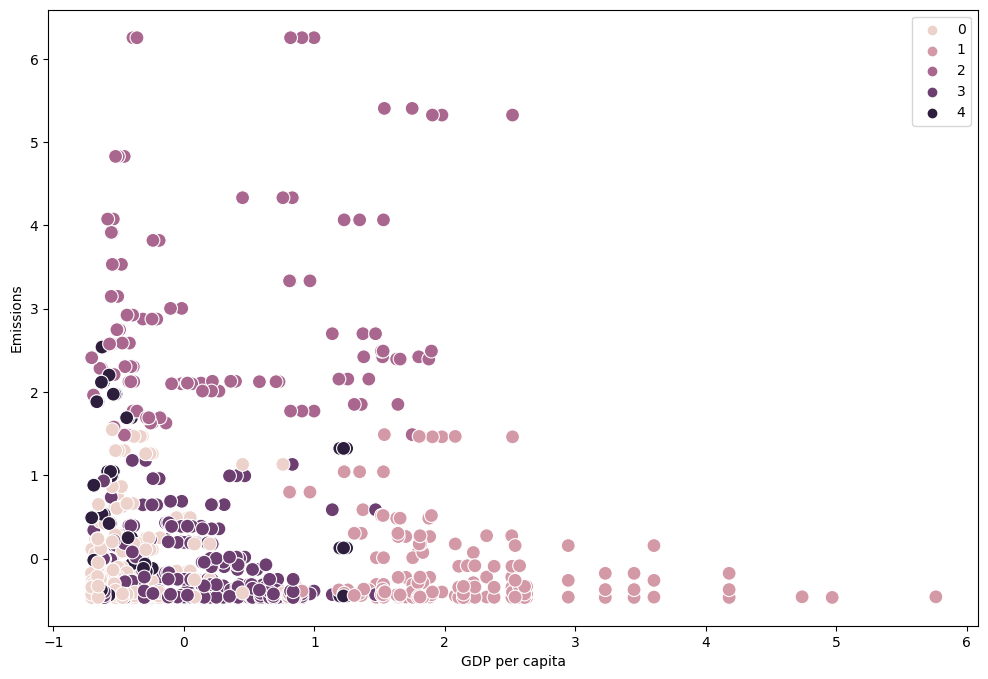

In [32]:
# Plot the clusters for the "GDP per capita" and "Emissions" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_clean['GDP per capita'], y=df_clean['Emissions quantity, tonnes'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('GDP per capita') # Label x-axis.
plt.ylabel('Emissions') # Label y-axis.
plt.show()

____
**In this plot, it is clear that countries with higher GDP per capita produce less emissions as the purple cluster indicates. Furthermore, the black cluster shows that higher emissions are produced  by countries with low GDP per capita (lower than Z-score of approx. 2). There are also countries with low GDP per capita and low emissions though as is demonstrated by the clusters 0 and 1. Cluster 3 is a bit sporadic, as there seems to be a variation in data: there are some countries with low GDP per capita that produce both: lower and higher amount of emissions. However, this cluster is not significant enough, as there are only 90 data points in it**

______

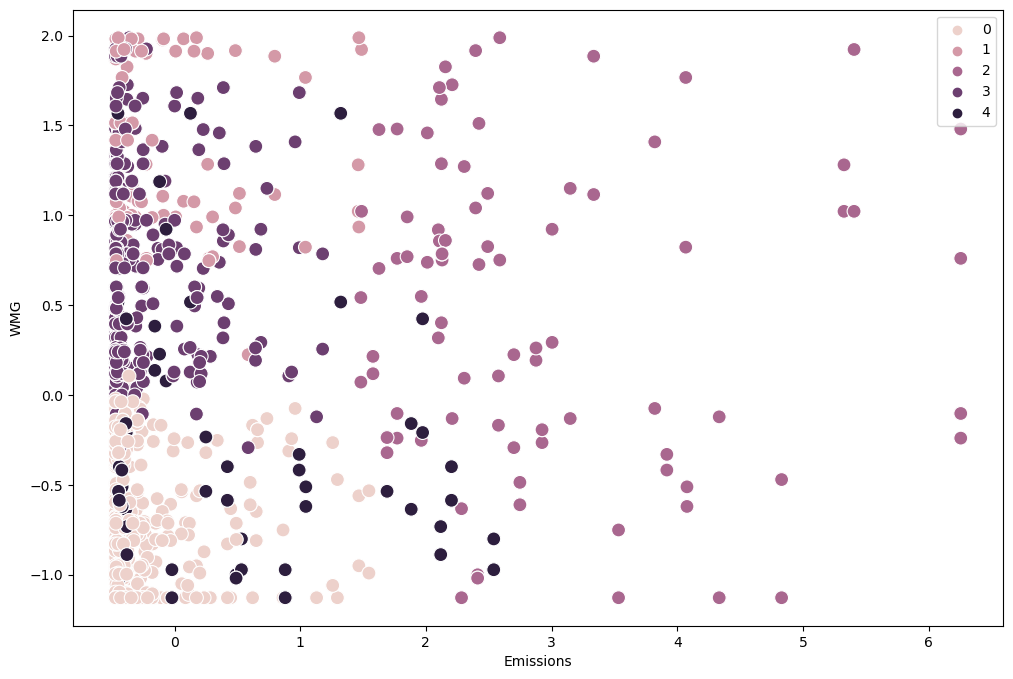

In [33]:
# Plot the clusters for the "WMG" and "Emissions" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_clean['Emissions quantity, tonnes'], y=df_clean['WMG'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Emissions') # Label x-axis.
plt.ylabel('WMG') # Label y-axis.
plt.show()

**It is obvious that there are countries with higher WMG that also produce less emissions as is indicated by clusters 1 and 2. Cluster 0 and most of the cluster 3 are situated in the lower left corner, where there are less emissions but at the same time lower WMG (which is kinda logical). Unfortunately, data points that indicate higher emissions (cluster 4) are not completely concentrated in the upper right corner as I preferred and wished for. There are rather scattered , so that there are countries with moderate emissions (between 2 and 3) that also have high WMG index,but also there are countries that also produce moderate emissions but have a low WMG index. There are unfortunately more data points of cluster 4 that indicate higher emissions (between 3 and 5) and lower WMG index that those of cluster 4 that that indicate higher emissions (between 3 and 5) and higher WMG at the same time. There are very few data points that show that those countries that emit more have a high WMG index. So few that they can be considered insignificant, unfortunately...**

### This analysis is more fruitful in terms of understanding the relationship between variables. I found out that there are relationships between Emissions and WMG, Emissions and GDP per capita, which were not visible for me before

In [34]:
from sklearn.utils import check_random_state

In [35]:

def plot_inertia(array, start=1, end=5):
    fig, ax = plt.subplots(figsize=(10, 6))
    inertia = []

    for i in range(start, end + 1):
        model, clusters = cluster(array, random_state=check_random_state(0), n_clusters=i)
        inertia.append(model.inertia_)

    from matplotlib.ticker import MaxNLocator
    plt.plot(range(start, end + 1), inertia)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    fig.canvas.draw()
    ax.set_xticklabels(ax.get_xticks(), fontsize=12)
    ax.set_yticklabels(ax.get_yticks(), fontsize=12)
    ax.set_title('The elbow method', fontsize=14)
    ax.set_ylabel('Inertia', fontsize=14)
    ax.set_xlabel('Number of clusters', fontsize=14)

    # Return both the figure and axis objects
    return ax


NameError: name 'cluster' is not defined

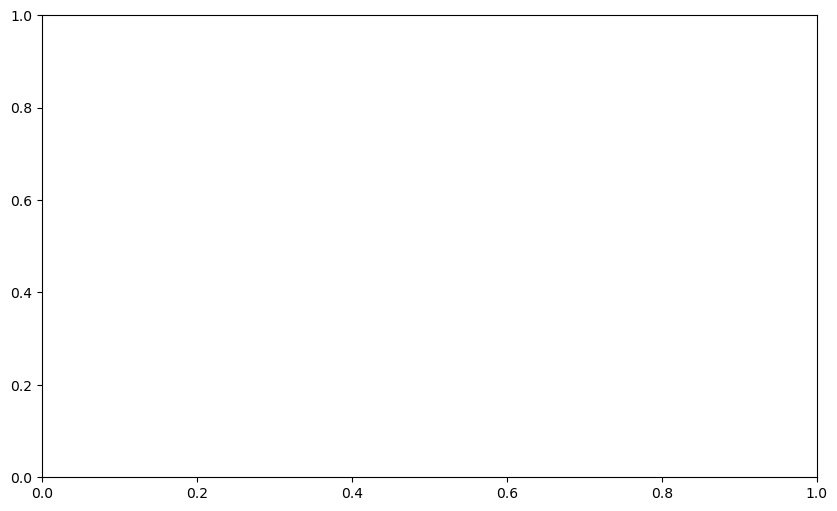

In [36]:
ax = plot_inertia(df_clean, start=1, end=5)
